---
title: "Topics in Econometrics and Data Science: Tutorial 5"

---

#### General Note

You will very likely find the solution to these exercises online. We, however, strongly encourage you to work on these exercises without doing so. Understanding someone else’s solution is very different from coming up with your own. Use the lecture notes and try to solve the exercises independently.

# Section 1: Basic Statistics

## Exercise 1: Normal distribution

### A)
A hard-drive manufacturer would like to ensure that the mean time between failures (MTBF) for its new hard drive is $1$ million hours. A stress test is designed that can simulate the workload at a much faster pace. The testers assume that a test lasting $10$ days correlates with the failure time exceeding the $1$- million-hour mark. In stress tests of $15$ hard drives they found an average of $9.5$ days, with a standard deviation of $1$ day. Does a $90\%$ confidence level include $10$ days?

**Hint**: You can use  [`scipy.stats.norm.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to get the percent point function (critical value) for the normal distribution for a given confidence level.

In [1]:
import scipy.stats as stats
import numpy as np

Two-sided: $$9.5 \pm \frac{1}{\sqrt{15}}q_z(0.95) =  (9.075301, 9.924699) $$

In [2]:
upper = 9.5 + 1 / np.sqrt(15) * stats.norm.ppf(0.95) 
lower = 9.5 - 1 / np.sqrt(15) * stats.norm.ppf(0.95) 
print(f"The 90% confidence interval lies between [{lower}, {upper}]. It does not include 10.")
print(f"The point on the probability distribution corresponding to a two-sided 90% confidence interval (critical value) lies at {stats.norm.ppf(0.95)}")

The 90% confidence interval lies between [9.075300619724539, 9.924699380275461]. It does not include 10.
The point on the probability distribution corresponding to a two-sided 90% confidence interval (critical value) lies at 1.6448536269514722


### B)
Let $X\sim \mathcal{N}(\mu,\sigma^2)$. We have seen that
$$\sqrt{n}\frac{\bar{X}_n-\mu}{\sigma}\sim \mathcal{N}(0,1)$$ 
and that by replacing the unknown parameter $\sigma^2$ by $\hat{S}^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2$ we obtain
$$Z_n:=\sqrt{n}\frac{\bar{X}_n-\mu}{\hat{S}} \xrightarrow[]{\mathcal{D}} Z\sim \mathcal{N}(0,1).$$
Therefore we can construct asymptotic confidence intervals for $\mu$. This means that the confidence interval satisfies the confidence level when $n$ is 'large'. But what happens when $n$ is 'small' and what do we mean by 'large'?
The distribution of $Z_n$ is called $t$-distribution with $n-1$ degrees of freedom.
Compare the densities of the normal distribution and the $t$-distribution for $n=3,10,25$ and $50$. What value of $n$ seems 'large' enough to say that the two distributions are essentially the same? 

To answer these questions, first, save $\mu$ and $\sigma$ and use [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to generate evenly spread x-values from -3 to 3, along which you will plot the distributions. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm

mu = 0
sigma = np.sqrt(1)
x = np.linspace(-3, 3, 201) 

Next, use [`scipy.stats.norm.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and [`scipy.stats.t.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) to create density functions along the x-values for the normal distribution and t-distributions for the different n. Save them as different y-variables, e.g. `y1` to `y5`.

In [4]:
# Add the density function
y1 = norm.pdf(x, mu, sigma) 
y2 = t.pdf(x, 2)  
y3 = t.pdf(x, 9)  
y4 = t.pdf(x, 24) 
y5 = t.pdf(x, 49)

Finally, with [`plt.figure`](https://matplotlib.org/stable/api/figure_api.html) and its suboptions, you can plot the distributions.

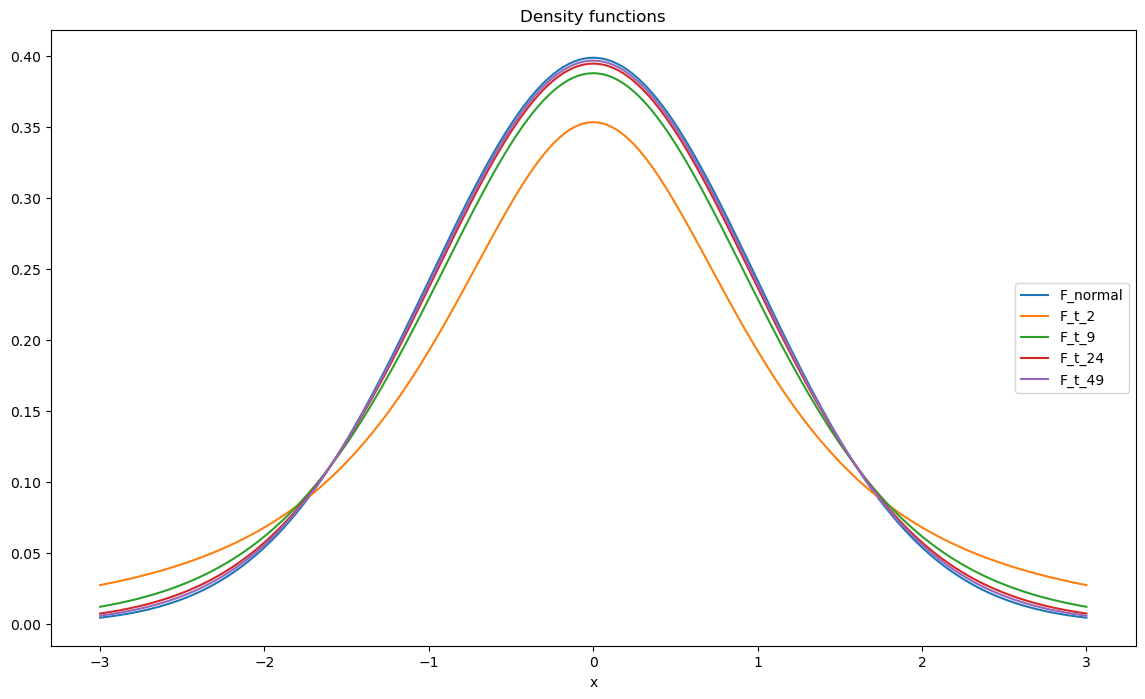

In [5]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y1, '-', linewidth=1.5, label='F_normal')
ax.plot(x, y2, '-', linewidth=1.5, label='F_t_2')
ax.plot(x, y3, '-', linewidth=1.5, label='F_t_9')
ax.plot(x, y4, '-', linewidth=1.5, label='F_t_24')
ax.plot(x, y5, '-', linewidth=1.5, label='F_t_49')

# layout
ax.grid(False)
ax.legend(loc='right')
ax.set_title('Density functions')
ax.set_xlabel('x');

### C)
Our goal is to use a simulation to compare the resulting confidence intervals of Exercise 1B) for $\mu=0$ (choose $\sigma^2=5$) with confidence level $95\%$. We will go through it step by step:

1. Load the necessary modules and save $\mu$, $\sigma$, and the critical value from the normal distribution for our given $\alpha$ (1-confidence level).

In [6]:
import scipy.stats as stats
import math

# Save mu and sigma
mu = 0
sigma = math.sqrt(5)

# Critical value, normal distribution
alpha = 0.05
quantile_norm = stats.norm.ppf(q = 1-alpha/2)
print(f"Critical value for 95% confidence interval derived from normal distribution: {quantile_norm}")

Critical value for 95% confidence interval derived from normal distribution: 1.959963984540054


2. Calculate the critical value derived from the t-distribution with $n=3$ and our given $\alpha$.
Use the [`stats.t.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) function.

In [7]:
n = 3
df = n-1 # degrees of freedom for the t-distribution
sample_size = n

# Critical value, t-distribution
quantile_t = stats.t.ppf(q=1-alpha/2,df=df)
print(f"Critical value derived from t-distribution, n = {n}: {quantile_t}")

Critical value derived from t-distribution, n = 3: 4.302652729696142


3. Set the random seed[`np.random.seed`](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.seed.html) to 123. Create one normally distributed sample for $\mu$, $\sigma$, and sample size $n=3$ with [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Calculate the mean and standard deviation. \
**Hint**: Remark that `np.var()` calculates $\frac{1}{n}\sum_{i=1}^n(X_i-\bar{X}_n)^2$.

In [8]:
np.random.seed(123)
sample = np.random.normal(mu, sigma, n)
sample_mean = sample.mean()
sample_std = math.sqrt(n/(n-1)*np.var(sample)) # the square root of the corrected sample variance

4. Calculate confidence intervals based on the normal distribution and the t-distribution for $n=3$. Check whether the true parameter $\mu$ is contained in the confidence intervals.

In [9]:
confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 

confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t,
                            sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 

print(f"Mean: {sample_mean}, \nCI normal: {confidence_interval_normal}, \nCI t-distr: {confidence_interval_t}")

if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
    print("Mean contained in CI based on normal distribution")
if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
    print(f"Mean contained in CI based on t-distribution with n = {n}")

Mean: 0.14511584866388894, 
CI normal: (-2.533143089464705, 2.823374786792483), 
CI t-distr: (-5.734389194218998, 6.0246208915467765)
Mean contained in CI based on normal distribution
Mean contained in CI based on t-distribution with n = 3


5. Repeat the procedure for $1000$ samples. How often does the mean lie within the confidence interval?

In [10]:
np.random.seed(123)
l = 1000

count_1 = 0
count_2 = 0

for l in range(1,l):
    sample = np.random.normal(mu, sigma, sample_size) 
    sample_mean = sample.mean() 
    sample_std = math.sqrt(n/(n-1)*np.var(sample)) 
    
    confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                    sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 
    
    confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t, 
                                sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 
    
    if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
        count_1 += 1
    if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
        count_2 += 1 
        
print("Coverage normal for n =",n,":", count_1/l*100) 
print("Coverage t for n =",n,":", count_2/l*100 ) 

Coverage normal for n = 3 : 79.97997997997997
Coverage t for n = 3 : 95.3953953953954


6. Finally, repeat the simulation for each $n$ (= 3, 10, 25 and 50): Calculate $1000$ independent samples and count how often the true parameter $\mu=0$ is contained in the confidence interval.\
**Hint**: Loop over $n$ (outer loop) and then loop over $l$ (inner loop).

In [11]:
np.random.seed(123)
n_vec = np.array([3,10,25,50])
l = 1000

for n in n_vec:
    print(f"\nRunning simulation for n = {n}")
    count_1 = 0
    count_2 = 0
    df = n-1 # degrees of freedom for the t-distribution
    sample_size = n

    # Critical value, t-distribution
    quantile_t = stats.t.ppf(q=1-alpha/2,df=df)
    print(f"Critical value derived from t-distribution: {quantile_t}")
    
    for l in range(1,l):
        sample = np.random.normal(mu, sigma, sample_size)
        sample_mean = sample.mean()
        sample_std = math.sqrt(n/(n-1)*np.var(sample)) 
        
        confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                      sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 
        
        confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t,
                                 sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 
        
        if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
            count_1 += 1
        if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
            count_2 += 1 
            
    print("Coverage normal for n =",n,":", count_1/l*100)
    print("Coverage t for n =",n,":", count_2/l*100 )


Running simulation for n = 3
Critical value derived from t-distribution: 4.302652729696142
Coverage normal for n = 3 : 79.97997997997997
Coverage t for n = 3 : 95.3953953953954

Running simulation for n = 10
Critical value derived from t-distribution: 2.2621571628540993
Coverage normal for n = 10 : 89.07815631262524
Coverage t for n = 10 : 93.3867735470942

Running simulation for n = 25
Critical value derived from t-distribution: 2.0638985616280205
Coverage normal for n = 25 : 93.48044132397192
Coverage t for n = 25 : 94.6840521564694

Running simulation for n = 50
Critical value derived from t-distribution: 2.0095752371292397
Coverage normal for n = 50 : 95.68273092369478
Coverage t for n = 50 : 96.18473895582329


Full code:

In [12]:
import scipy.stats as stats
import math

# Save mu and sigma
mu = 0
sigma = math.sqrt(5)

# Critical value, normal distribution
alpha = 0.05
quantile_norm = stats.norm.ppf(q = 1-alpha/2)
print(f"Critical value for 95% confidence interval derived from normal distribution: {quantile_norm}")

np.random.seed(123)
n_vec = np.array([3,10,25,50])
l = 1000

for n in n_vec:
    print(f"\nRunning simulation for n = {n}")
    count_1 = 0
    count_2 = 0
    df = n-1 # degrees of freedom for the t-distribution
    sample_size = n

    # Critical value, t-distribution
    quantile_t = stats.t.ppf(q=1-alpha/2,df=df)
    print(f"Critical value derived from t-distribution: {quantile_t}")
    
    for l in range(1,l):
        sample = np.random.normal(mu, sigma, sample_size)
        sample_mean = sample.mean()
        sample_std = math.sqrt(n/(n-1)*np.var(sample)) 
        
        confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                      sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 
        
        confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t,
                                 sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 
        
        if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
            count_1 += 1
        if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
            count_2 += 1 
            
    print("Coverage normal for n =",n,":", count_1/l*100)
    print("Coverage t for n =",n,":", count_2/l*100 )

Critical value for 95% confidence interval derived from normal distribution: 1.959963984540054

Running simulation for n = 3
Critical value derived from t-distribution: 4.302652729696142
Coverage normal for n = 3 : 79.97997997997997
Coverage t for n = 3 : 95.3953953953954

Running simulation for n = 10
Critical value derived from t-distribution: 2.2621571628540993
Coverage normal for n = 10 : 89.07815631262524
Coverage t for n = 10 : 93.3867735470942

Running simulation for n = 25
Critical value derived from t-distribution: 2.0638985616280205
Coverage normal for n = 25 : 93.48044132397192
Coverage t for n = 25 : 94.6840521564694

Running simulation for n = 50
Critical value derived from t-distribution: 2.0095752371292397
Coverage normal for n = 50 : 95.68273092369478
Coverage t for n = 50 : 96.18473895582329


## Exercise 2: Hypothesis Testing (I)

#### **Please complete Exercise 2 at home. We will not discuss this exercise during the tutorial session. Please note that it is also important to understand the purpose of the respective tests as well as the meaning of the test results.**

Load the [`brain_size.csv`](https://alexandragibbon.github.io/StatProg-HHU/data/brain_size.csv) data set from last week and repeat the data cleaning steps (remove column `'Unnamed: 0'`)

In [ ]:
import os
path = "C:/Users/DICE/Dropbox/Statistical Programming/StatProg-HHU-oct24"
os.chdir(path)
# os.chdir("[INSERT YOUR PATH HERE!]")

import numpy as np
import pandas as pd

brain_size = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")
brain_size.drop(['Unnamed: 0'], axis = 1, inplace = True)

print(brain_size.head())
print(f"Dimensions of dataset: {brain_size.shape}")

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female   133  132  124   118.0    64.5     816932
1    Male   140  150  124     NaN    72.5    1001121
2    Male   139  123  150   143.0    73.3    1038437
3    Male   133  129  128   172.0    68.8     965353
4  Female   137  132  134   147.0    65.0     951545
Dimensions of dataset: (40, 7)


At first we calculate some more descriptive statistics.

### 1)
Plot the weight as a histogram using [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

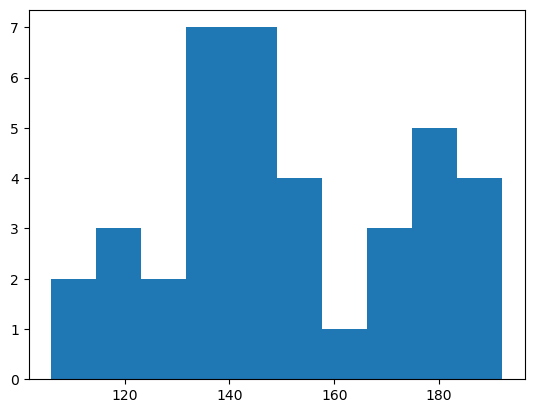

In [14]:
import matplotlib.pyplot as plt
plt.hist(brain_size.dropna()['Weight'], bins = 10)
plt.show()

Assume that the VIQ, weight and height are normally distributed.

### 2) 
What can you say about the hypothesis that the mean of the VIQ is 100? Perform a one-sample t-test. 

**Hint**: Use [`stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

In [15]:
import scipy.stats as stats
import numpy as np
print(brain_size['VIQ'].mean())
print(np.shape(brain_size))
stats.ttest_1samp(brain_size['VIQ'].values, 100)

112.35
(40, 7)


TtestResult(statistic=3.307414638540179, pvalue=0.002030117404781822, df=39)

### 3)
Can you reject the hypothesis that the mean of the VIQ is the same for women and men? Test the same hypothesis for weight and height.

**Hint**: Perform the T-test for the means of two independent samples of scores using [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind). Familiarise yourself with the function using `help(stats.ttest_ind)`. 

In [16]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.

    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.

    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    equal_

In [17]:
female_viq = brain_size[brain_size['Gender'] == 'Female']['VIQ']
male_viq = brain_size[brain_size['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq,equal_var=True)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

In [18]:
female_weight = brain_size[brain_size['Gender'] == 'Female']['Weight']
male_weight = brain_size[brain_size['Gender'] == 'Male']['Weight']
stats.ttest_ind(female_weight, male_weight.dropna(),equal_var=True)

TtestResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05, df=36.0)

In [19]:
female_height = brain_size[brain_size['Gender'] == 'Female']['Height']
male_height = brain_size[brain_size['Gender'] == 'Male']['Height']
stats.ttest_ind(female_height.dropna(), male_height.dropna(),equal_var=True)

TtestResult(statistic=-6.280184459523685, pvalue=2.623667704653113e-07, df=37.0)

In [20]:
stats.ttest_ind(female_viq, male_viq,equal_var=False)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44466074519419074, df=36.973150284539706)

### 4) 
Visually inspect the VIQ data. Is the assumption of the normal distribution of the VIQ justified? 

**Hint**: Use [`stats.shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) to perform the Shapiro-Wilk test for normality. Here, the null hypothesis is that the population is distributed normally.

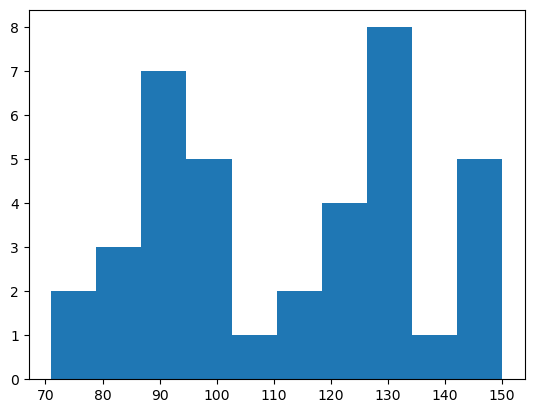

In [21]:
# see the histogram for VIQ
plt.hist(brain_size.dropna()['VIQ'],bins = 10)
plt.show() 

In [22]:
stats.shapiro(brain_size['VIQ'])

ShapiroResult(statistic=0.921285675817543, pvalue=0.008454337624065661)

### 5) 
Is the result for VIQ in 3. still valid if we drop the assumption of normality? Which null hypothesis are we actually testing?

**Hint**: Use [`stats.wilcoxon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) to calculate the Wilcoxon signed-rank test. This test needs equal sample sizes.

In [23]:
help(stats.wilcoxon)

Help on function wilcoxon in module scipy.stats._morestats:

wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', *, axis=0, nan_policy='propagate', keepdims=False)
    Calculate the Wilcoxon signed-rank test.

    The Wilcoxon signed-rank test tests the null hypothesis that two
    related paired samples come from the same distribution. In particular,
    it tests whether the distribution of the differences ``x - y`` is symmetric
    about zero. It is a non-parametric version of the paired T-test.

    Parameters
    ----------
    x : array_like
        Either the first set of measurements (in which case ``y`` is the second
        set of measurements), or the differences between two sets of
        measurements (in which case ``y`` is not to be specified.)  Must be
        one-dimensional.
    y : array_like, optional
        Either the second set of measurements (if ``x`` is the first set of
        measurements), or not specified (if 

In [24]:
stats.wilcoxon(female_viq, male_viq)

WilcoxonResult(statistic=82.5, pvalue=0.40909767150878906)

### 6)
Can we reject the assumption that males and females have the same distribution of VIQ? Compare two histograms to interpret your result!\
**Hint**: Perform the two-sample Kolmogorov-Smirnov test for goodness of fit [`stats.ks_2samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html).

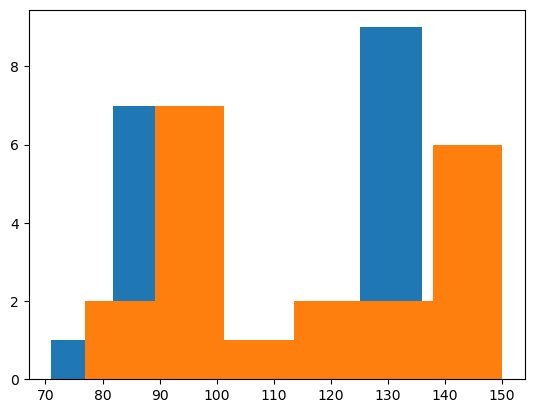

In [25]:
import matplotlib.pyplot as plt
plt.figure
plt.hist(female_viq,bins = 6)
plt.hist(male_viq,bins = 6)
plt.show() 

In [26]:
help(stats.ks_2samp)

Help on function ks_2samp in module scipy.stats._stats_py:

ks_2samp(data1, data2, alternative='two-sided', method='auto', *, axis=0, nan_policy='propagate', keepdims=False)
    Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.

    This test compares the underlying continuous distributions F(x) and G(x)
    of two independent samples.  See Notes for a description of the available
    null and alternative hypotheses.

    Parameters
    ----------
    data1, data2 : array_like, 1-Dimensional
        Two arrays of sample observations assumed to be drawn from a continuous
        distribution, sample sizes can be different.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the null and alternative hypotheses. Default is 'two-sided'.
        Please see explanations in the Notes below.
    method : {'auto', 'exact', 'asymp'}, optional
        Defines the method used for calculating the p-value.
        The following options are available (defau

In [27]:
stats.ks_2samp(female_viq, male_viq)

KstestResult(statistic=0.3, pvalue=0.33559098126008213, statistic_location=136, statistic_sign=1)